# KNN Modeling

**Import the necessary packages**

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 150, 'display.max_rows', 150)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score

**Read in the data**

In [2]:
df = pd.read_csv('final_df.csv')

**Defining our features for our Condom use model and our Alcohol/Drugs before sex model**

In [3]:
# Condom use
features_0 = ['YEAR', 'raceeth', 'How old are you', 'What is your sex',
       'In what grade are you','Seat belt use', 'Riding with a drinking driver',
       'Drinking and driving', 'Weapon carrying', 'Weapon carrying at school',
       'Safety concerns at school', 'Threatened at school',
       'Physical fighting', 'Physical fighting at school',
       'Forced sexual intercourse', 'Bullying at school',
       'Electronic bullying', 'Sad or hopeless', 'Considered suicide',
       'Made a suicide plan', 'Attempted suicide', 'Injurious suicide attempt',
       'Ever cigarette use', 'Initiation of cigarette smoking',
       'Current cigarette use', 'Current smokeless tobacco use',
       'Current cigar use', 'Initiation of alcohol use', 'Current alcohol use',
       'Source of alcohol', 'Ever marijuana use',
       'Initiation of marijuana use', 'Current marijuana use',
       'Ever steroid use', 'Illegal injected drug use',
       'Illegal drugs at school', 'Ever sexual intercourse',
       'Sex before 13 years', 'Multiple sex partners',
       'Current sexual activity', 'Alcohol/drugs and sex','Birth control pill use', 
        'Perception of weight', 'Weight loss',
       'Television watching', 'Computer use', 'HIV testing', 'Asthma', 'Sleep',
       'Ever used LSD',
       'Has used hard drugs', 'healthy_eating', 'regular_activity']
condom_use = df['Condom use']

In [4]:
features_1 = ['YEAR', 'raceeth', 'How old are you', 'What is your sex',
       'In what grade are you',
       'Seat belt use', 'Riding with a drinking driver',
       'Drinking and driving', 'Weapon carrying', 'Weapon carrying at school',
       'Safety concerns at school', 'Threatened at school',
       'Physical fighting', 'Physical fighting at school',
       'Forced sexual intercourse', 'Bullying at school',
       'Electronic bullying', 'Sad or hopeless', 'Considered suicide',
       'Made a suicide plan', 'Attempted suicide', 'Injurious suicide attempt',
       'Ever cigarette use', 'Initiation of cigarette smoking',
       'Current cigarette use', 'Current smokeless tobacco use',
       'Current cigar use', 'Initiation of alcohol use', 'Current alcohol use',
       'Source of alcohol', 'Ever marijuana use',
       'Initiation of marijuana use', 'Current marijuana use',
       'Ever steroid use', 'Illegal injected drug use',
       'Illegal drugs at school', 'Ever sexual intercourse',
       'Sex before 13 years', 'Multiple sex partners',
       'Current sexual activity', 'Condom use','Birth control pill use', 
        'Perception of weight', 'Weight loss',
       'Television watching', 'Computer use', 'HIV testing', 'Asthma', 'Sleep',
       'Ever used LSD',
       'Has used hard drugs', 'healthy_eating', 'regular_activity']
alc_and_sex = df['Alcohol/drugs and sex']

**Dummy vars**

In [5]:
#Turn all features into object types
features_0 = df[features_0].astype('object')
features_1 = df[features_1].astype('object')

In [6]:
dummies_0 = pd.get_dummies(features_0,drop_first=False)
dummies_1 = pd.get_dummies(features_1,drop_first=False)

**Let's take a look to see if there is a class imbalance amongst our two seperate target variables**

**Condom use**

In [7]:
print('Raw counts: \n')
print(condom_use.value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(condom_use.value_counts(normalize=True))

Raw counts: 

1.0    30252
2.0    14095
3.0     9201
Name: Condom use, dtype: int64
-----------------------------------
Normalized counts: 

1.0    0.564951
2.0    0.263222
3.0    0.171827
Name: Condom use, dtype: float64


**Alcohol/drugs and sex**

In [8]:
print('Raw counts: \n')
print(alc_and_sex.value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(alc_and_sex.value_counts(normalize=True))

Raw counts: 

1.0    30252
3.0    18811
2.0     4485
Name: Alcohol/drugs and sex, dtype: int64
-----------------------------------
Normalized counts: 

1.0    0.564951
3.0    0.351292
2.0    0.083757
Name: Alcohol/drugs and sex, dtype: float64


## Modifying class imbalance amongst our target variables

**Using SMOTE on condom use**

In [9]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(dummies_0, condom_use, test_size=0.25, random_state=1)
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_0, y_train_0) 

In [10]:
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Synthetic sample class distribution: 

1.0    22727
2.0    22727
3.0    22727
Name: Condom use, dtype: int64


**Using SMOTE on alcohol/drugs with sex**

In [11]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(dummies_1, alc_and_sex, test_size=0.25, random_state=1)
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_1, y_train_1) 

In [12]:
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Synthetic sample class distribution: 

1.0    22727
3.0    22727
2.0    22727
Name: Alcohol/drugs and sex, dtype: int64


## KNN with Condom Use as the dependant variable

**Instantiate the KNN model**

In [13]:
knn = KNeighborsClassifier(n_neighbors=1, p = 2)

In [14]:
knn.fit(dummies_0,condom_use)

KNeighborsClassifier(n_neighbors=1)

**Train test split**

In [15]:
scaler = StandardScaler()  
scaler.fit(X_train_0)

X_train_0 = scaler.transform(X_train_0)  
X_test_0 = scaler.transform(X_test_0)  


model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_0, y_train_0)

y_predict_0 = model.predict(X_test_0)

In [16]:
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score(y_test_0, y_predict_0, average='weighted')

0.8309088865269869

In [41]:
print('Accuracy:', metrics.accuracy_score(y_test_0, y_predict_0))

Accuracy: 0.8420856054381116


[[7499   19    7]
 [ 160  606  306]
 [ 510 3133 1147]]


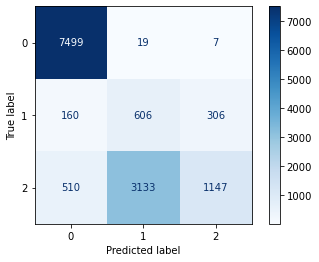

In [53]:
cm = confusion_matrix(y_test_1, y_predict_0)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

## KNN with Alc and sex as dependant variable

**Fitting the model**

In [17]:
knn = KNeighborsClassifier(n_neighbors=1, p = 2)

In [18]:
knn.fit(dummies_1,alc_and_sex)

KNeighborsClassifier(n_neighbors=1)

In [19]:
scaler = StandardScaler()  
scaler.fit(X_train_1)

X_train_1 = scaler.transform(X_train_1)  
X_test_1 = scaler.transform(X_test_1)  


model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_1, y_train_1)

y_predict_1 = model.predict(X_test_1)

In [20]:
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score(y_test_1, y_predict_1, average='weighted')

0.8582956548558817

In [42]:
print('Accuracy:', metrics.accuracy_score(y_test_1, y_predict_1))

Accuracy: 0.8708448494808396


[[7499    8   18]
 [ 145  242  685]
 [ 524  349 3917]]


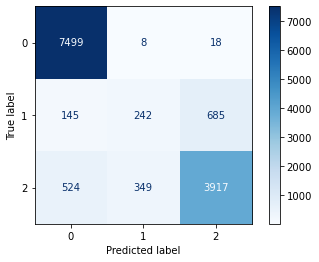

In [43]:
cm = confusion_matrix(y_test_1, y_predict_1 )
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [44]:
df['Alcohol/drugs and sex'].value_counts()

1.0    30252
3.0    18811
2.0     4485
Name: Alcohol/drugs and sex, dtype: int64

# Decision Tree 

In [30]:
import sklearn.metrics as metrics

**Decsion Tree for Condom use**

In [ ]:
features_0 = ['YEAR', 'raceeth', 'How old are you', 'What is your sex',
       'In what grade are you','Seat belt use', 'Riding with a drinking driver',
       'Drinking and driving', 'Weapon carrying', 'Weapon carrying at school',
       'Safety concerns at school', 'Threatened at school',
       'Physical fighting', 'Physical fighting at school',
       'Forced sexual intercourse', 'Bullying at school',
       'Electronic bullying', 'Sad or hopeless', 'Considered suicide',
       'Made a suicide plan', 'Attempted suicide', 'Injurious suicide attempt',
       'Ever cigarette use', 'Initiation of cigarette smoking',
       'Current cigarette use', 'Current smokeless tobacco use',
       'Current cigar use', 'Initiation of alcohol use', 'Current alcohol use',
       'Source of alcohol', 'Ever marijuana use',
       'Initiation of marijuana use', 'Current marijuana use',
       'Ever steroid use', 'Illegal injected drug use',
       'Illegal drugs at school', 'Ever sexual intercourse',
       'Sex before 13 years', 'Multiple sex partners',
       'Current sexual activity', 'Alcohol/drugs and sex','Birth control pill use', 
        'Perception of weight', 'Weight loss',
       'Television watching', 'Computer use', 'HIV testing', 'Asthma', 'Sleep',
       'Ever used LSD',
       'Has used hard drugs', 'healthy_eating', 'regular_activity']
condom_use = df['Condom use']

In [28]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df[features_0], condom_use, test_size=0.25, random_state=1)
X_train_2, y_train_2 = smote.fit_sample(X_train_2, y_train_2) 


In [32]:
dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dtc.fit(X_train_2, y_train_2)
dtc_preds_0  = dtc.predict(X_test_2)
dtc_f1 = metrics.f1_score(y_test_2, dtc_preds_0,average = 'weighted')
print(dtc_f1)

0.9525397489197727


In [35]:
print('Accuracy:', metrics.accuracy_score(y_test_2, dtc_preds_0))

Accuracy: 0.9519683274818854


[[7525    0    0]
 [   0  991 2581]
 [   0  841 1449]]


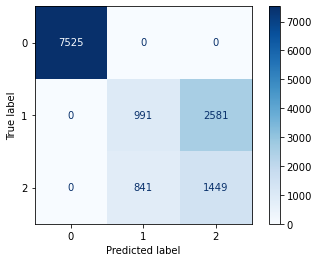

In [40]:
cm = confusion_matrix(y_test_2, dtc_preds_0 )
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

**Decsion Tree for Alcohol/drugs and sex**

In [36]:
features_1 = ['YEAR', 'raceeth', 'How old are you', 'What is your sex',
       'In what grade are you',
       'Seat belt use', 'Riding with a drinking driver',
       'Drinking and driving', 'Weapon carrying', 'Weapon carrying at school',
       'Safety concerns at school', 'Threatened at school',
       'Physical fighting', 'Physical fighting at school',
       'Forced sexual intercourse', 'Bullying at school',
       'Electronic bullying', 'Sad or hopeless', 'Considered suicide',
       'Made a suicide plan', 'Attempted suicide', 'Injurious suicide attempt',
       'Ever cigarette use', 'Initiation of cigarette smoking',
       'Current cigarette use', 'Current smokeless tobacco use',
       'Current cigar use', 'Initiation of alcohol use', 'Current alcohol use',
       'Source of alcohol', 'Ever marijuana use',
       'Initiation of marijuana use', 'Current marijuana use',
       'Ever steroid use', 'Illegal injected drug use',
       'Illegal drugs at school', 'Ever sexual intercourse',
       'Sex before 13 years', 'Multiple sex partners',
       'Current sexual activity', 'Condom use','Birth control pill use', 
        'Perception of weight', 'Weight loss',
       'Television watching', 'Computer use', 'HIV testing', 'Asthma', 'Sleep',
       'Ever used LSD',
       'Has used hard drugs', 'healthy_eating', 'regular_activity']
alc_and_sex = df['Alcohol/drugs and sex']

In [37]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df[features_1], alc_and_sex, test_size=0.25, random_state=1)
X_train_3, y_train_3 = smote.fit_sample(X_train_3, y_train_3) 


In [38]:
dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dtc.fit(X_train_3, y_train_3)
dtc_preds_0  = dtc.predict(X_test_3)
dtc_f1 = metrics.f1_score(y_test_3, dtc_preds_0,average = 'weighted')
print(dtc_f1)

0.9025555564948794


In [39]:
print('Accuracy:', metrics.accuracy_score(y_test_2, dtc_preds_0))

Accuracy: 0.7443788750280123


# Instantiate the classifier using 100 trees

**Condom use**

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1, n_estimators=100)

In [46]:
#fit the model to the training data
rfc.fit(X_train_0, y_train_0)

RandomForestClassifier(random_state=1)

In [51]:
#use the fitted model to predict on the test data
rfc_preds = rfc.predict(X_test_0)
rfc_f1 = metrics.f1_score(y_test_0, rfc_preds,average = 'weighted')
rfc_acc = metrics.accuracy_score(y_test_0, rfc_preds)
# checking accuracy on the test data
print('Test F1 score: ', rfc_f1)
print('Test Accuracy score: ', rfc_acc)

Test F1 score:  0.9518116314263805
Test Accuracy score:  0.9512960334653021


[[7525    0    0]
 [   0 3043  529]
 [   0  123 2167]]


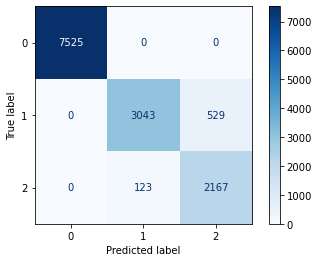

In [52]:
cm = confusion_matrix(y_test_0, rfc_preds,title = 'Confusion Matrix')
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

**Alcohol/drugs and drugs**

In [ ]:
#fit the model to the training data
rfc.fit(X_train_1, y_train_1)

In [49]:
#use the fitted model to predict on the test data
rfc_preds = rfc.predict(X_test_1)
rfc_f1 = metrics.f1_score(y_test_1, rfc_preds,average = 'weighted')
rfc_acc = metrics.accuracy_score(y_test_1, rfc_preds)
# checking accuracy on the test data
print('Test F1 score: ', rfc_f1)
print('Test Accuracy score: ', rfc_acc)

Test F1 score:  0.780572003268747
Test Accuracy score:  0.7541644879360574


[[7525    0    0]
 [   0  469  603]
 [   0 2688 2102]]


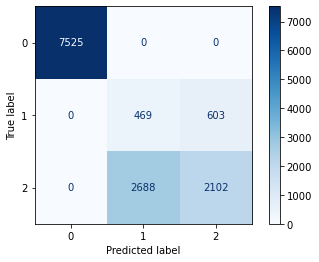

In [50]:
cm = confusion_matrix(y_test_1, rfc_preds)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()